In [0]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [9]:
! unzip /gdrive/My\ Drive/AMC/images.zip

Archive:  /gdrive/My Drive/AMC/images.zip
   creating: images/
  inflating: images/671.jpg          
  inflating: images/672.jpg          
  inflating: images/673.jpg          
  inflating: images/675.jpg          
  inflating: images/676.jpg          
  inflating: images/677.jpg          
  inflating: images/678.jpg          
  inflating: images/679.jpg          
  inflating: images/680.jpg          
  inflating: images/681.jpg          
  inflating: images/682.jpg          
  inflating: images/684.jpg          
  inflating: images/685.jpg          
  inflating: images/686.jpg          
  inflating: images/687.jpg          
  inflating: images/688.jpg          
  inflating: images/689.jpg          
  inflating: images/690.jpg          
  inflating: images/691.jpg          
  inflating: images/692.jpg          
  inflating: images/693.jpg          
  inflating: images/694.jpg          
  inflating: images/695.jpg          
  inflating: images/696.jpg          
  inflating: images/697.j

In [10]:
!ls 

images	sample_data


In [11]:
train = pd.read_csv('/gdrive/My Drive/AMC/final.csv')
train.head()

,index,genres
0,3,drama
1,4,"adventure,drama,fantasy"
2,5,"action,adventure,history"
3,6,"drama,mystery,thriller"
4,7,"action,thriller"


In [12]:
train.shape

(2858, 2)

In [13]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('images/' + str(train['index'][i])+'.jpg', target_size=(67, 67, 3))
    img = image.img_to_array(img)
    img = img/255.0
    train_image.append(img)
    
X = np.array(train_image)
X.shape

  4%|▍         | 125/2858 [00:00<00:02, 1246.60it/s]/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
100%|██████████| 2858/2858 [00:01<00:00, 1655.41it/s]


(2858, 67, 67, 3)

'adventure,drama,fantasy'

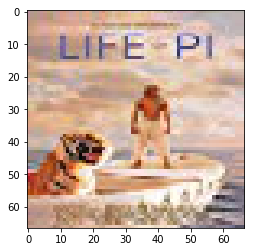

In [14]:
plt.imshow(X[1])
train['genres'][1]

In [15]:
onehot = train['genres'].str.get_dummies(sep=',')
onehot.head()

,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,game-show,history,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war,western
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [16]:
data = pd.concat([train, onehot], axis=1)
data.head()

,index,genres,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,game-show,history,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war,western
0,3,drama,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,"adventure,drama,fantasy",0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,"action,adventure,history",1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,6,"drama,mystery,thriller",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,7,"action,thriller",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [17]:
y = np.array(data.drop(['index', 'genres'], axis=1))
y.shape

(2858, 23)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [0]:
num_classes = 23
input_shape = (67, 67, 3)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [42]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=64)

Train on 2286 samples, validate on 572 samples
Epoch 1/30
2286/2286 [==============================] - 3s 1ms/sample - loss: 0.2544 - acc: 0.9278 - val_loss: 0.1867 - val_acc: 0.9275
Epoch 2/30
2286/2286 [==============================] - 2s 759us/sample - loss: 0.1953 - acc: 0.9299 - val_loss: 0.1814 - val_acc: 0.9305
Epoch 3/30
2286/2286 [==============================] - 2s 777us/sample - loss: 0.1902 - acc: 0.9306 - val_loss: 0.1789 - val_acc: 0.9290
Epoch 4/30
2286/2286 [==============================] - 2s 775us/sample - loss: 0.1842 - acc: 0.9315 - val_loss: 0.1792 - val_acc: 0.9319
Epoch 5/30
2286/2286 [==============================] - 2s 781us/sample - loss: 0.1780 - acc: 0.9333 - val_loss: 0.1790 - val_acc: 0.9317
Epoch 6/30
2286/2286 [==============================] - 2s 779us/sample - loss: 0.1695 - acc: 0.9352 - val_loss: 0.1827 - val_acc: 0.9328
Epoch 7/30
2286/2286 [==============================] - 2s 777us/sample - loss: 0.1609 - acc: 0.9379 - val_loss: 0.1863 - val_a

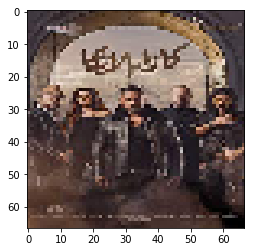

In [48]:
img = image.load_img('/gdrive/My Drive/AMC/caza.jpg', target_size=(67, 67, 3))
img = image.img_to_array(img)
img = img/255.0
plt.imshow(img)

In [36]:
data.columns, len(data.columns)

(Index(['index', 'genres', 'action', 'adventure', 'animation', 'biography',
        'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy',
        'film-noir', 'game-show', 'history', 'horror', 'music', 'musical',
        'mystery', 'romance', 'sci-fi', 'sport', 'thriller', 'war', 'western'],
       dtype='object'), 25)

thriller 0.4990989863872528
action 0.33130523562431335
drama 0.12971952557563782


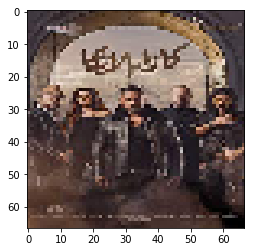

In [0]:
classes = np.array(data.columns[2:])
probs = model.predict(img.reshape(1, 67,67,3)) # the external dim is to make it look like a batch
top_3 = np.argsort(probs[0])[:-4:-1]
for i in range(3):
  print(f'{classes[top_3][i]} {probs[0][top_3][i]}')
plt.imshow(img)